#  Team: Python rangers

## Members: Bhuvana, Madhu, Mahitha

### Step 1: Install prequisites

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Step 2: Import required libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sn

### Step 3: Reading the input excel sheets in to dataframes

In [55]:
xls = pd.ExcelFile(r'HospitalDatabase.xlsx')

# Dataframes of each sheet in the excel file. 
# We use the same variables wherever necessary instead of creating dataframes again and again

patients_df = pd.read_excel(xls, 'Patients')
visits_df = pd.read_excel(xls, 'EDVisits')
Ambvisits_df = pd.read_excel(xls, 'AmbulatoryVisits') 
readmit_df = pd.read_excel(xls, 'ReAdmissionRegistry')
discharge_df = pd.read_excel(xls, 'Discharges')
provider_df = pd.read_excel(xls, 'Providers')
edunique_df =  pd.read_excel(xls, 'EDUnique')

### Solutions

#### Q3:"Create a figure object called fig using plt.figure() ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** Plot (x,y) on that axes and set the labels and titles to match the plot below:**"

Text(0.5, 1.0, 'fig')

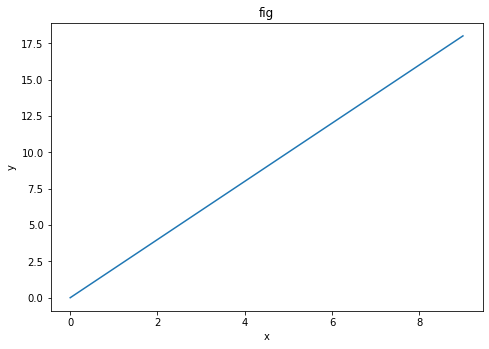

In [8]:
x = np.arange(0,10)
y = x*2

%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('fig')

#### Q4: Display Data By splitting age in 4 quartiles and labeling the quartiles

In [9]:
# Step 1: convert datetime column to just date
patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date

# Step 2: Calculate age(This function converts given date to age)
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
# display the dataframe with new age column
display(patients_df)

#Step 3: find the unique values
patients_df.Age.unique()

# Step 4: Split the records in to quartiles
bins = [35,40,50,60,70]
labels = ['Below 40','Below 50','Below 60','Below 70']
patients_df['AgeGroup'] = pd.cut(patients_df['Age'], bins=bins, labels=labels, right=False)
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01,Male,White,English,62
1,2,Far,Myers,1985-11-15,Male,White,English,36
2,3,Devlin,Michael,1976-04-15,Male,White,English,46
3,4,Carmine,Texas,1968-10-15,Male,White,English,53
4,5,Tann,Bama,1962-05-01,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01,Male,White,English,62,Below 70
1,2,Far,Myers,1985-11-15,Male,White,English,36,Below 40
2,3,Devlin,Michael,1976-04-15,Male,White,English,46,Below 50
3,4,Carmine,Texas,1968-10-15,Male,White,English,53,Below 60
4,5,Tann,Bama,1962-05-01,Male,White,English,60,Below 70
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35,Below 40
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51,Below 60
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39,Below 40
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58,Below 60


#### Q7 : Create a pair plot by taking parameter "hue" as EDDisposition

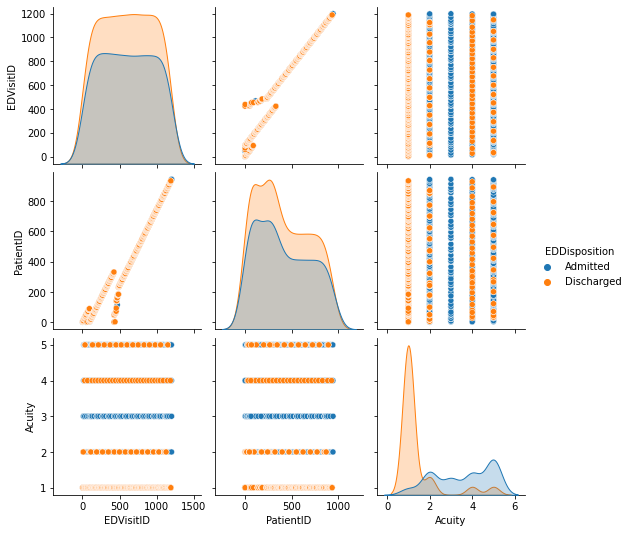

In [10]:
sn.pairplot(visits_df, hue='EDDisposition')

#### Q11: Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

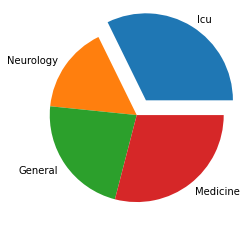

In [11]:
ExLOS = np.array([10,5,7,9])
Service= ["Icu", "Neurology", "General", "Medicine"]
explod = [0.2, 0, 0, 0]

plt.pie(ExLOS, labels = Service, explode = explod)
plt.show() 

#### Q13: Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

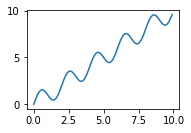

In [12]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

plt.subplot(2, 2,1)
plt.plot(x,y)

#### Q15 : Replace all the null values in ReadmissionFlag with 0

In [13]:
display(readmit_df) #shows NaN values in ReadmissionFlag

readmit_df['ReadmissionFlag'] = readmit_df['ReadmissionFlag'].fillna(0)
display(readmit_df) #replaced NaN with 0 for ReadmissionFlag

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


#### Q17 : Create a heat map to show the correlation between the column values of Edvisits

<AxesSubplot:>

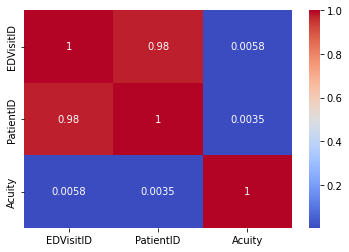

In [14]:
sn.heatmap(visits_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Heatmap ignores the non numeric columns, so the below heatmap shows the correlation between numeric columns in Edvisits

#### Q20 : Count of number of patients admitted based on Primary Diagnosis and Service provided

In [15]:
patientadm_df = readmit_df[['PatientID','PrimaryDiagnosis', 'Service']].groupby(['PrimaryDiagnosis','Service']).count()
patientadm_df = patientadm_df.rename(columns={'PatientID': 'No.of Patients'})
display(patientadm_df)

No.of Patients
PrimaryDiagnosis   Service                         
AMI                Cardiology                    40
                   Hospitalist                    1
                   ICU                            5
                   Neurology                      2
Afib               Cardiology                    10
                   ICU                            1
Broken Leg         Cardiology                     3
                   General Medicine               3
                   Hospitalist                    3
Diabetes           General Medicine              38
                   Hospitalist                   26
Fever              General Medicine              13
                   Hospitalist                    3
                   ICU                            3
Flu                Cardiology                     2
                   General Medicine              54
                   Hospitalist                   19
                   ICU                            3
                   Neurology                      2
Heart Failure      Cardiology                    39
                   ICU                           33
                   Neurology                      6
Hip Fracture       Orthopeadics                  23
Hypertension       General Medicine              35
                   Hospitalist                    6
                   ICU                            4
                   Neurology                      5
Kidney Failure     Cardiology                     1
                   General Medicine              12
                   Hospitalist                    6
                   ICU                            1
Knee Replacement   Hospitalist                    1
                   Orthopeadics                  22
Laceration         General Medicine              21
                   Hospitalist                    7
                   ICU                            1
Migraine           Neurology                     12
Pain               Neurology                      7
Pneumonia          General Medicine              67
                   Hospitalist                   28
                   ICU                           77
                   Neurology                      5
Spinal Cord Injury ICU                            2
Stroke             General Medicine              20
                   Hospitalist                    1
                   ICU                           21
                   Neurology                     26

#### Q22 : Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [16]:
df_new = pd.DataFrame()
df_new[["Date","Time"]] = readmit_df["DischargeDate"].astype(str).str.split(expand=True)
display(df_new)

,Date,Time
0,2018-01-04,19:59:31.391
1,2018-01-04,21:28:51.898
2,2018-01-04,22:28:23.672
3,2018-01-05,05:47:04.933
4,2018-01-05,14:18:30.029
...,...,...
715,2018-03-07,21:22:10.061
716,2018-03-08,02:43:18.749
717,2018-03-08,09:27:18.377
718,2018-03-10,06:06:12.068


#### Q24: Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [17]:
patientcount_df = visits_df[['PatientID','ReasonForVisit', 'EDDisposition']].groupby(['ReasonForVisit', 'EDDisposition']).count()
patientcount_df = patientcount_df.unstack()
patientcount_df.fillna(0, inplace=True)
patientcount_df.columns = patientcount_df.columns.get_level_values(1)
display(patientcount_df)

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,0.0
Bleeding,16.0,15.0
Car Accident,17.0,0.0
Chest Pain,94.0,15.0
Cough,0.0,1.0
Fever,46.0,188.0
Gun Shot,16.0,0.0
Intoxication,0.0,30.0
Laceration,0.0,30.0


#### Q25 :Plot a graph by counting the no. of patients in each department

Text(0, 0.5, 'DepartmentID')

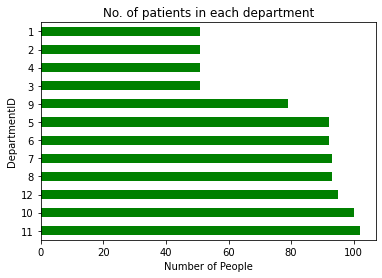

In [18]:
Countpatients = pd.value_counts(Ambvisits_df['VisitDepartmentID'].values, sort=True)

Countpatients.plot.barh(title='No. of patients in each department', color='green')
plt.xlabel('Number of People')
plt.ylabel('DepartmentID')


#### Q26 : Using Arrays and Loops, find the count of of patients based on gender

In [19]:
male_patients = 0
female_patients = 0

for index, row in patients_df.iterrows():
    if(row["Gender"]=='Male'):
        male_patients = male_patients + 1
    else:
        female_patients = female_patients + 1
        
print('No. of Male Patients:' , male_patients)
print('No. of Female Patients:' , female_patients)

No. of Male Patients: 537
No. of Female Patients: 408


#### Q27: Plot a graph to count the patients based on discharge disposition

                      PatientID
DischargeDisposition           
Expired                     104
Home                        577
Transfer                     39


Text(0, 0.5, 'Discharge Disposition')

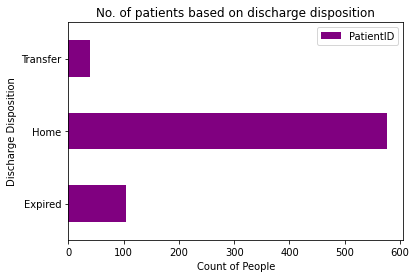

In [20]:
patientcnt_df = discharge_df[['PatientID','DischargeDisposition']].groupby(['DischargeDisposition']).count()
print(patientcnt_df)
patientcnt_df.plot.barh(title='No. of patients based on discharge disposition', color='purple')
plt.xlabel('Count of People')
plt.ylabel('Discharge Disposition')

#### Q28 : Which reason of visit has maximum mortality rate

In [21]:
max_value = discharge_df["ExpectedMortality"]. max()
print('\n')
print('max mortality rate : ', max_value) # find the max mortality rate
pid = discharge_df[discharge_df.ExpectedMortality == max_value]
display(pid) #find the row with max mortality rate

# with the patientid find the reasonofvisit with high mortality from EDvisits
 
df_common = visits_df.loc[visits_df['PatientID'].isin(pid['PatientID'])]
print('\n')
print('The reason of visit that has maximum mortality rate is :', df_common.ReasonForVisit)



max mortality rate :  0.9899452598970535


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
88,190,572,2018-02-14,2018-02-25 13:02:30.113,Expired,Neurology,Pneumonia,10.372029,0.989945




The reason of visit that has maximum mortality rate is : 353    Pneumonia
Name: ReasonForVisit, dtype: object


#### Q33 : Using a bar chart, which Service had the lowest count of Expected Mortality?

                  ExpectedMortality
Service                            
Cardiology                 0.267605
General Medicine           0.271582
Hospitalist                0.319124
ICU                        0.457278
Neurology                  0.473460
Orthopeadics               0.322251


Service with lowest Expected Mortality is : Cardiology


Text(0, 0.5, 'ExpectedMortality')

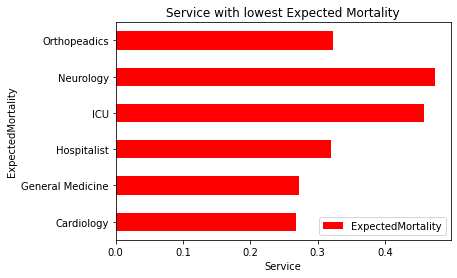

In [22]:
mortality_df = discharge_df[['ExpectedMortality','Service']].groupby(['Service']).mean()
print(mortality_df)
minValueIndexObj = mortality_df.idxmin().loc[mortality_df.min().idxmin()]
print('\n')
print('Service with lowest Expected Mortality is :', minValueIndexObj )
mortality_df.plot.barh(title='Service with lowest Expected Mortality', color='red')
plt.xlabel('Service')
plt.ylabel('ExpectedMortality')

#### Q36 : Create a correlation matrix on EDVisits

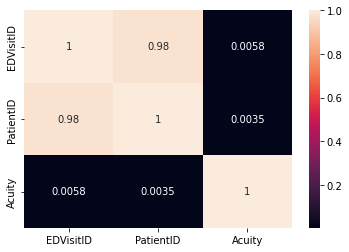

In [23]:
corrMatrix = visits_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Q38 : Number of patients on 'Transfer' based on primary diagnosis

Number of patients on Transfer based on primary diagnosis

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Afib                1
Knee Replacement    1
Laceration          1
Pain                1
dtype: int64


Text(0, 0.5, 'Number of People')

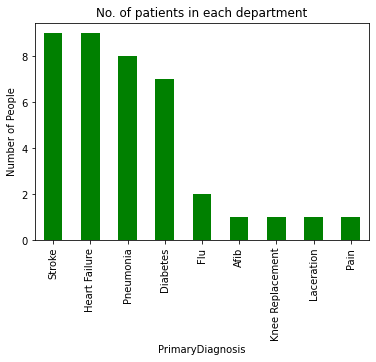

In [24]:
trans_df = discharge_df.loc[discharge_df['DischargeDisposition'] == 'Transfer']

Cntpatients = pd.value_counts(trans_df['PrimaryDiagnosis'].values, sort=True)
print('Number of patients on Transfer based on primary diagnosis\n')
print(Cntpatients)
Cntpatients.plot.bar(title='No. of patients in each department', color='green')
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('Number of People')

#### Q40 : Plot a graph showing the count of patients for the reason visited the hospital.

                     PatientID
ReasonForVisit                
Accident                    39
Bleeding                    31
Car Accident                17
Chest Pain                 109
Cough                        1
Fever                      234
Gun Shot                    16
Intoxication                30
Laceration                  30
Migraine                   156
Pneumonia                  201
Shortness of Breath        149
Stomach Ache               186


<AxesSubplot:xlabel='ReasonForVisit'>

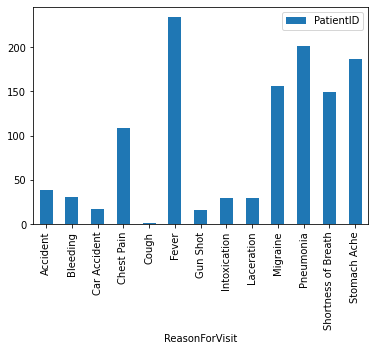

In [25]:
count_df = visits_df[['PatientID','ReasonForVisit']].groupby(['ReasonForVisit']).count()
print(count_df)
count_df.plot(kind='bar')

#### Q41 : Find the visit type with maximum 'No Show'

In [26]:
vst_df = Ambvisits_df.loc[Ambvisits_df['VisitStatus'] == 'No Show']
Cnt = vst_df[['VisitType','VisitStatus']].groupby(['VisitType']).count()
max_type = Cnt.idxmax().loc[Cnt.max().idxmax()]

print('The visit type with maximum ''No Show'' status is: ', max_type)


The visit type with maximum No Show status is:  Telemedicine


#### Q42 : Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery

In [27]:
dfnew=provider_df.loc[((provider_df['ProviderID'] > 11) & (provider_df['ProviderID'] < 20)) 
                      & (provider_df['ProviderSpecialty'] == 'Surgery')]
print('Details of the providers with providerId  between 11 and 20 and with ProviderSpecialty as Surgery')
display(dfnew)

Details of the providers with providerId  between 11 and 20 and with ProviderSpecialty as Surgery


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


#### Q44 : Create a pivot table displaying average LOS based on Service and Primary Diagnosis

In [28]:
tbl = pd.pivot_table(data=discharge_df, 
                        index=['Service'], 
                        columns=['PrimaryDiagnosis'], 
                        values='ExpectedLOS',
                        aggfunc='mean')
# since there were Nan values for few cells, replacing as Nan values with 0
tbl.fillna(0, inplace=True)
display(tbl)

PrimaryDiagnosis,AMI,Afib,Broken Leg,Diabetes,Fever,Flu,Heart Failure,Hip Fracture,Hypertension,Kidney Failure,Knee Replacement,Laceration,Migraine,Pain,Pneumonia,Spinal Cord Injury,Stroke
Service,,,,,,,,,,,,,,,,,
Cardiology,12.414202,13.162920,3.911826,0.000000,0.000000,3.970428,13.014044,0.000000,0.000000,6.580273,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
General Medicine,0.000000,0.000000,3.368132,5.665298,6.803796,6.141753,0.000000,0.000000,5.369365,5.943163,0.000000,6.771154,0.000000,0.000000,6.140270,0.00000,7.173333
Hospitalist,13.828290,0.000000,7.125069,7.874359,8.865651,7.033979,0.000000,0.000000,7.864913,7.850346,2.255705,7.069360,0.000000,0.000000,8.146240,0.00000,15.349671
ICU,12.503213,9.651522,0.000000,0.000000,3.860693,4.953871,12.784620,0.000000,5.092533,9.045995,0.000000,10.101443,0.000000,0.000000,13.523626,15.27654,13.297978
Neurology,10.482847,0.000000,0.000000,0.000000,0.000000,6.700593,12.737565,0.000000,4.276454,0.000000,0.000000,0.000000,12.202213,11.441453,7.527330,0.00000,12.745608
Orthopeadics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.474971,0.000000,0.000000,3.702839,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


#### Q45 : Calculate mortality by diagnosis

In [29]:
mortal_df = discharge_df.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum() 
display(mortal_df)

PrimaryDiagnosis
AMI                   11.287028
Afib                   3.346590
Broken Leg             2.478958
Diabetes              18.334439
Fever                  5.635418
Flu                   21.838083
Heart Failure         30.082879
Hip Fracture           8.586140
Hypertension          14.827774
Kidney Failure         4.951837
Knee Replacement       6.678844
Laceration             7.917630
Migraine               6.808469
Pain                   3.837848
Pneumonia             66.307360
Spinal Cord Injury     0.400558
Stroke                30.085412
Name: ExpectedMortality, dtype: float64

#### Q48 : Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)

In [30]:
avglos_df = discharge_df[['ExpectedLOS','DischargeDisposition','Service']].groupby(['DischargeDisposition','Service']).mean()
display(avglos_df)

ExpectedLOS
DischargeDisposition Service                      
Expired              Cardiology           9.202626
                     General Medicine     5.874003
                     Hospitalist          6.775636
                     ICU                  9.919063
                     Neurology            9.384312
                     Orthopeadics         3.943883
Home                 Cardiology          12.864936
                     General Medicine     6.105696
                     Hospitalist          8.009046
                     ICU                 13.451158
                     Neurology           12.538859
                     Orthopeadics         3.508337
Transfer             Cardiology          11.818403
                     General Medicine     6.116124
                     Hospitalist          5.701389
                     ICU                 11.989238
                     Neurology           11.469198
                     Orthopeadics         4.842255

#### Q52 : Retrieve the row with minimum DBP using sorting technique

In [31]:
rslt_df = Ambvisits_df.sort_values(by = 'BloodPressureDiastolic', na_position="first")
display(rslt_df)
# get the row of minimum value
print(rslt_df.loc[rslt_df['BloodPressureDiastolic'].idxmin()])

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
175,640,665,31,2019-02-13,2019-01-22 12:40:01.783,8,Telemedicine,NaN,NaN,NaN,Completed
176,134,605,32,2019-01-10,2018-12-16 09:13:26.148,2,Telemedicine,NaN,NaN,NaN,Completed
177,904,855,33,2019-04-16,2019-03-17 08:45:24.687,8,Telemedicine,NaN,NaN,NaN,Completed
178,942,893,34,2019-02-23,2019-01-24 21:37:15.071,6,Telemedicine,NaN,NaN,NaN,Completed
179,890,908,35,2019-04-02,2019-04-01 19:27:06.557,10,New,NaN,NaN,NaN,Completed
...,...,...,...,...,...,...,...,...,...,...,...
326,448,832,3,2019-03-31,2019-03-01 23:12:47.721,3,Telemedicine,189.0,155.653608,51.321976,Completed
601,894,912,30,2019-04-06,2019-03-27 16:23:48.684,6,New,186.0,155.804729,76.300348,Completed
325,580,97,13,2019-03-17,2019-02-25 18:31:48.729,8,Telemedicine,189.0,155.822062,86.142019,Completed
264,108,527,25,2019-04-18,2019-04-15 05:45:08.072,12,New,188.0,157.241230,65.078184,Completed


VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object


#### Q57 : Find the age prone to get stroke

In [32]:
# # Step 1: convert datetime column to just date
# patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date

# # Step 2: Calculate age(This function converts given date to age)
# def age(bdate):
#     today = date.today()
#     return today.year - bdate.year - ((today.month, 
#                                       today.day) < (bdate.month, 
#                                                     bdate.day))
  
# patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
# display the dataframe with new age column
# display(patients_df)
admit_df = patients_df.loc[readmit_df.query("PrimaryDiagnosis == 'Stroke'")['PatientID']]
admit_df
#Step 3: find the unique values
age_df = admit_df[['PatientID','Age']].groupby(['Age']).count()
age_df
# print(age_df.idxmax().loc[age_df.max().idxmax()])

,PatientID
Age,
36,2
37,3
39,2
40,5
41,4
42,3
43,4
44,1
45,4


#### Q58 : Display total count of patients service wise based on gender

In [33]:
merged_df = patients_df.merge(readmit_df, how = 'inner', on = ['PatientID'])
gen_df = merged_df[['PatientID','Service','Gender']].groupby(['Service','Gender']).count()
gen_df.rename(columns = {'PatientID':'No.of Patients'}, inplace = True)
gen_df

No.of Patients
Service          Gender                
Cardiology       Female              41
                 Male                54
General Medicine Female             114
                 Male               149
Hospitalist      Female              35
                 Male                66
ICU              Female              65
                 Male                86
Neurology        Female              34
                 Male                31
Orthopeadics     Female              22
                 Male                23

#### Q59 : Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [34]:
pname = pd.DataFrame()
pname[['firstname','lastname']]= provider_df.ProviderName.str.split(' ',expand=True)
print(pname)

    firstname  lastname
0       Sally       Sue
1        Mike     Myers
2      Jordan   Michael
3         Ted     Texas
4         Ala      Bama
5       Harry      Kane
6       Barry       Bar
7         Ted     Green
8         Ted     Black
9        Fred       Man
10        Kim  Kimberly
11      Sarah        Ab
12    Abigail   Marriot
13       Dave        Yu
14  Christian     Saint
15      Perry    Pardon
16       Kent   Kendall
17       Ryan     Kevin
18      Tyler    Conner
19     Bailey    Barret
20      Megan     Bonco
21     Joesph    Walter
22     Walter      King
23       Luke      Long
24     Justin      Time
25       Mike    Joseph
26    Bridget    Brenda
27     Brenda      Bing
28   Chandler      Bing
29     Joesph      Ross
30     Dwight     Scott
31    Michael   Halpert
32     Pamela      Ding
33       Tony     Creed
34    Phyllis   Stanley
35      Holly       Hue
36      Trent       Tye
37   Kimberly      Cone
38      Harry      West
39      Rosie    Renter


#### Q60 : Predict the output of the program..

In [35]:
class Acc: 
    def __init__(self, id): 
        self.ID  = id
        id = 555 
acc = Acc(111) 
print(acc.id)

AttributeError: 'Acc' object has no attribute 'id'

Output for Q60 :
Will throw Indentation error if the above code is run as is without indentation

#### Q62 : Display the data for all 'White Female' patients above the age of 50

In [36]:
patients_df.loc[(patients_df['Age'] > 50) & (patients_df['Race'] == 'White')].iloc[:,:-2]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01,Male,White,English
3,4,Carmine,Texas,1968-10-15,Male,White,English
4,5,Tann,Bama,1962-05-01,Male,White,English
5,6,Jerrilyn,Kane,1969-03-30,Male,White,English
7,8,Alexandra,Green,1967-06-16,Male,White,English
...,...,...,...,...,...,...,...
882,883,Munmro,Rubbens,1970-01-30,Male,White,English
886,887,Silvester,O'Shavlan,1968-11-15,Male,White,English
890,891,Giovanni,Guion,1965-01-16,Male,White,English
891,892,Funk,Chansonnau,1962-02-20,Male,White,English


#### Q63 : Using loc, retrieve the firstname and lastname of patients between indices 101 and 200

In [37]:
patients_df.loc[101:200, ['FirstName', 'LastName']]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


#### Q65 : Get the count of number of patients based on service and primary diagnosis

In [38]:
readmit_df[['PatientID','Service','PrimaryDiagnosis']].groupby(['Service','PrimaryDiagnosis']).count().rename(columns={'PatientID':'No. of Patients'})

No. of Patients
Service          PrimaryDiagnosis                   
Cardiology       AMI                              40
                 Afib                             10
                 Broken Leg                        3
                 Flu                               2
                 Heart Failure                    39
                 Kidney Failure                    1
General Medicine Broken Leg                        3
                 Diabetes                         38
                 Fever                            13
                 Flu                              54
                 Hypertension                     35
                 Kidney Failure                   12
                 Laceration                       21
                 Pneumonia                        67
                 Stroke                           20
Hospitalist      AMI                               1
                 Broken Leg                        3
                 Diabetes                         26
                 Fever                             3
                 Flu                              19
                 Hypertension                      6
                 Kidney Failure                    6
                 Knee Replacement                  1
                 Laceration                        7
                 Pneumonia                        28
                 Stroke                            1
ICU              AMI                               5
                 Afib                              1
                 Fever                             3
                 Flu                               3
                 Heart Failure                    33
                 Hypertension                      4
                 Kidney Failure                    1
                 Laceration                        1
                 Pneumonia                        77
                 Spinal Cord Injury                2
                 Stroke                           21
Neurology        AMI                               2
                 Flu                               2
                 Heart Failure                     6
                 Hypertension                      5
                 Migraine                         12
                 Pain                              7
                 Pneumonia                         5
                 Stroke                           26
Orthopeadics     Hip Fracture                     23
                 Knee Replacement                 22

#### Q67 : Make a pivot table by counts the no. of patients from the admission date till discharge date

In [63]:
discharge_df['Dis_date'] = discharge_df['DischargeDate'].dt.strftime('%Y-%m-%d')
# discharge_df
tbl = pd.pivot_table(data=discharge_df, 
                        index=['AdmissionDate'], 
                        columns=['Dis_date'], 
                               aggfunc='count')
# since there were Nan values for few cells, replacing as Nan values with 0
tbl.fillna(0, inplace=True)
display(tbl)


AdmissionID                                              \
Dis_date       2018-01-04 2018-01-05 2018-01-06 2018-01-07 2018-01-08   
AdmissionDate                                                           
2018-01-01            3.0        2.0        1.0        3.0        1.0   
2018-01-02            0.0        1.0        0.0        1.0        1.0   
2018-01-03            0.0        0.0        0.0        0.0        1.0   
2018-01-04            0.0        0.0        0.0        1.0        2.0   
2018-01-05            0.0        0.0        0.0        0.0        0.0   
2018-01-06            0.0        0.0        0.0        0.0        0.0   
2018-01-07            0.0        0.0        0.0        0.0        0.0   
2018-01-08            0.0        0.0        0.0        0.0        0.0   
2018-01-09            0.0        0.0        0.0        0.0        0.0   
2018-01-10            0.0        0.0        0.0        0.0        0.0   
2018-01-11            0.0        0.0        0.0        0.0        0.0   
2018-01-12            0.0        0.0        0.0        0.0        0.0   
2018-01-13            0.0        0.0        0.0        0.0        0.0   
2018-01-14            0.0        0.0        0.0        0.0        0.0   
2018-01-15            0.0        0.0        0.0        0.0        0.0   
2018-01-16            0.0        0.0        0.0        0.0        0.0   
2018-01-17            0.0        0.0        0.0        0.0        0.0   
2018-01-18            0.0        0.0        0.0        0.0        0.0   
2018-01-19            0.0        0.0        0.0        0.0        0.0   
2018-01-20            0.0        0.0        0.0        0.0        0.0   
2018-01-21            0.0        0.0        0.0        0.0        0.0   
2018-01-22            0.0        0.0        0.0        0.0        0.0   
2018-01-23            0.0        0.0        0.0        0.0        0.0   
2018-01-24            0.0        0.0        0.0        0.0        0.0   
2018-01-25            0.0        0.0        0.0        0.0        0.0   
2018-01-26            0.0        0.0        0.0        0.0        0.0   
2018-01-27            0.0        0.0        0.0        0.0        0.0   
2018-01-28            0.0        0.0        0.0        0.0        0.0   
2018-01-29            0.0        0.0        0.0        0.0        0.0   
2018-01-30            0.0        0.0        0.0        0.0        0.0   
2018-01-31            0.0        0.0        0.0        0.0        0.0   
2018-02-01            0.0        0.0        0.0        0.0        0.0   
2018-02-02            0.0        0.0        0.0        0.0        0.0   
2018-02-03            0.0        0.0        0.0        0.0        0.0   
2018-02-04            0.0        0.0        0.0        0.0        0.0   
2018-02-05            0.0        0.0        0.0        0.0        0.0   
2018-02-06            0.0        0.0        0.0        0.0        0.0   
2018-02-07            0.0        0.0        0.0        0.0        0.0   
2018-02-08            0.0        0.0        0.0        0.0        0.0   
2018-02-09            0.0        0.0        0.0        0.0        0.0   
2018-02-10            0.0        0.0        0.0        0.0        0.0   
2018-02-11            0.0        0.0        0.0        0.0        0.0   
2018-02-12            0.0        0.0        0.0        0.0        0.0   
2018-02-13            0.0        0.0        0.0        0.0        0.0   
2018-02-14            0.0        0.0        0.0        0.0        0.0   
2018-02-15            0.0        0.0        0.0        0.0        0.0   
2018-02-16            0.0        0.0        0.0        0.0        0.0   
2018-02-17            0.0        0.0        0.0        0.0        0.0   
2018-02-18            0.0        0.0        0.0        0.0        0.0   
2018-02-19            0.0        0.0        0.0        0.0        0.0   
2018-02-20            0.0        0.0        0.0        0.0        0.0   
2018-02-21            0.0        0.0        0.0        0.0        0.0   

#### Q83: Create the plot below by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

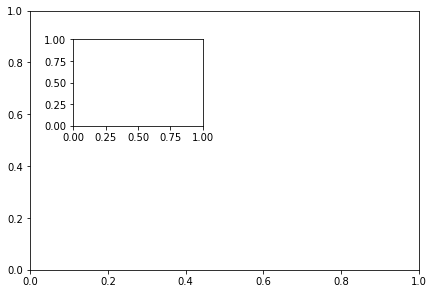

In [39]:

# Creating an empty object
fig = plt.figure()
 
# Creation of multiple axes
# main axes
axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) 
 
# secondary axes
axes2 = fig.add_axes([0.2, 0.6, 0.3, 0.3]) 

#### Q73 : Delete the column 'DischargeDispostion' iteratively

In [58]:
# cnt =0
# for column in discharge_df:
#     print(column)
#     if column == "DischargeDispostion":
#         display(cnt)
#         discharge_df.drop('DischargeDispostion', axis =1)
#         break;
# # display(discharge_df)
# for col in df.columns:
#     if 'A' in col:
#         del df[col]
  
# df


temp_df = readmit_df


for col in temp_df.columns:
    if col == 'DischargeDispostion':
        temp_df.drop(temp_df.columns[[4]], axis = 1, inplace=True)

        
display(readmit_df)

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


#### Q77 : Create a bar chart by making sets on Acuity & EDDischarge column & make the hatchs onto the bar by using set_hatch() method

In [ ]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(np.random.rand(5, 2), columns=['a', 'b'])
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()

#### Q 79 : Which Primary Diagnosis has the biggest difference between maximum and minimum Expected LOS?

In [73]:
diff_df1 = pd.DataFrame(discharge_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].max() )
diff_df2  = pd.DataFrame(discharge_df.groupby('PrimaryDiagnosis')['ExpectedLOS'].min() )
diff_df = diff_df1.merge(diff_df2, how = 'inner', on = ['PrimaryDiagnosis'])
# diff_df['LOS_diff'] = 
big_diff = abs(diff_df['ExpectedLOS_x'] - diff_df['ExpectedLOS_y']).idxmax()
print('Primary Diagnosis that has the biggest difference between maximum and minimum Expected LOS is :')
display(big_diff)

Primary Diagnosis that has the biggest difference between maximum and minimum Expected LOS is :


'Pneumonia'